# Pearson: Student Performance Analysis

**Leng Yang**

**Last Updated: 2/6/25**

## Assignment

Project Source: https://platform.stratascratch.com/data-projects/student-performance-analysis

The purpose of this project is to delve into student data to uncover insights that could help understand and predict student success across different academic periods. As a contributor, you will explore the relationship between student grades and a myriad of demographic, social, and school-related factors. Your analysis will directly impact our ability to identify and address key influences on student performance.

**Your Tasks:**
1. **Create Data Visualizations**:

* Generate histograms to observe the distribution of grades (G1, G2, G3) and other numerical factors like age and study time.
* Construct box plots to spot outliers and understand the spread of the data.
* Use bar charts to compare the average grades across different categories such as gender, parental education level, and internet access.
* Your visualizations should help highlight trends and patterns that may influence student performance.

2. **Perform Statistical Tests**:

* Conduct Chi-Square Tests to investigate the association between categorical variables (e.g., gender, internet access) and student grades. For example, is there a statistical difference in grades between students with different levels of parental education?
* Apply t-tests to compare the mean grades between two different groups, such as students from urban versus rural areas.
* Use regression analysis to predict final grades based on various factors like study time and past failures.
* Document your findings, interpret the p-values, and discuss the statistical significance of your results.

## Data Description

The datasets, `student-mat.csv` and `student-por.csv`, include:

* `School`: The school attended by the student.
* `Sex`: Gender of the student.
* `Age`: Age of the student.
* `Address`: Urban or rural area of residence.
* `Medu & Fedu`: Parents' education level.
* `Studytime`: Weekly study time.
* `Failures`: Number of past class failures.
* `G1, G2, G3`: Grades in the first, second, and final periods.
* etc.

<BR><BR>

### Data Exploration

In [204]:
#Load in packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Set to veiw all columns
pd.set_option('display.max_columns', None)

In [25]:
#Load in data files
df_mat = pd.read_csv('./datasets/student-mat.csv', sep=';')
df_por = pd.read_csv('./datasets/student-por.csv', sep=';')

In [40]:
#Math dataframe information
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [50]:
#Portuguese dataframe information
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [276]:
#Check for duplicate records
print('Math subject duplicate records:', df_mat.duplicated().sum())
print('Portuguese language subject duplicate records:', df_por.duplicated().sum())

Math subject duplicate records: 0
Portuguese language subject duplicate records: 0


In [352]:
#Mathematics subject descriptive statistics
df_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [354]:
#Portuguese subject descriptive statistics
df_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [356]:
#Preview first 5 records
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [358]:
#Preview first 5 records
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


<BR>

### 1. **Create Data Visualizations**:

* Generate histograms to observe the distribution of grades (G1, G2, G3) and other numerical factors like age and study time.
* Construct box plots to spot outliers and understand the spread of the data.
* Use bar charts to compare the average grades across different categories such as gender, parental education level, and internet access.
* Your visualizations should help highlight trends and patterns that may influence student performance.

#### **Generate histograms to observe the distribution of grades (G1, G2, G3) and other numerical factors like age and study time.**

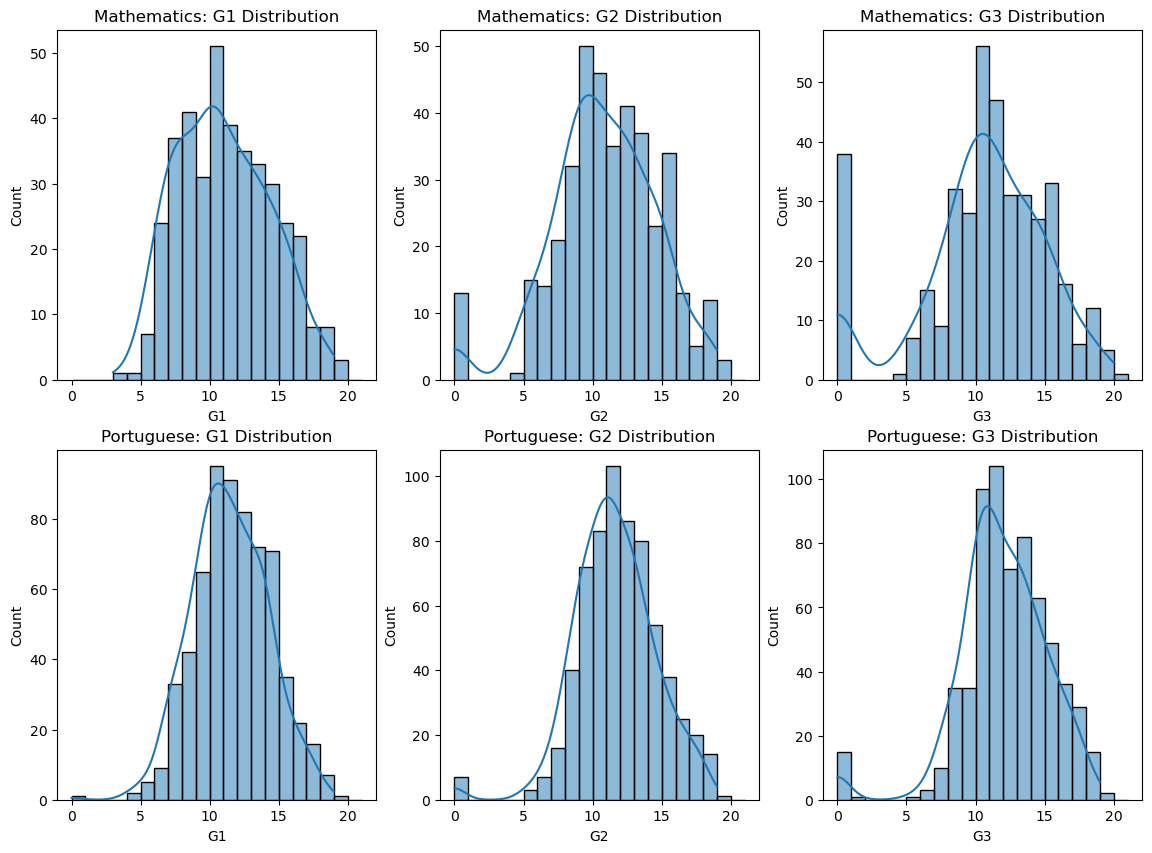

In [242]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[14,10])
s_name = ['Mathematics', 'Portuguese']
grades = ['G1','G2','G3']
subjects = [df_mat, df_por]
s_ct = 0

for i in range(2):
    g_ct = 0
    for j in range(3):
        sns.histplot(data=subjects[s_ct], x=grades[g_ct], kde=True, bins=np.arange(0,22), ax=axes[i,j])
        axes[i,j].set_title(f'{s_name[s_ct]}: {grades[g_ct]} Distribution')
        g_ct += 1
    s_ct += 1

**Observations on Math and Portuguese Grade Distributions**
* Distributions are fairly similar across all periods and subjects.
* Math classes have a higher number of students with a grade of zero.
* There are a fairly high number of Math students in G3 with a grade of zero.

#### **Construct box plots to spot outliers and understand the spread of the data.**

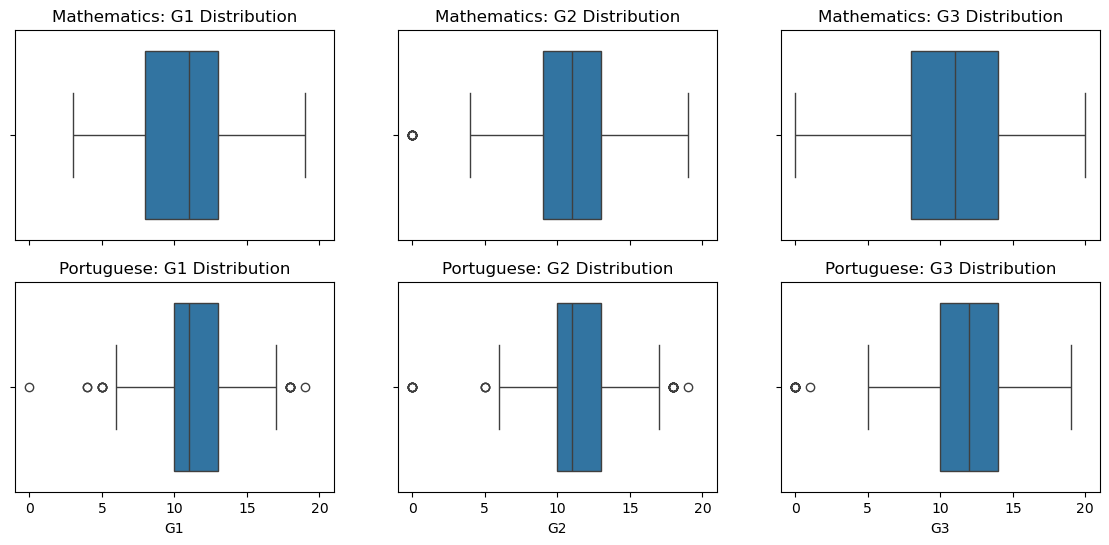

In [255]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[14,6], sharex=True)
s_name = ['Mathematics', 'Portuguese']
grades = ['G1','G2','G3']
subjects = [df_mat, df_por]
s_ct = 0

for i in range(2):
    g_ct = 0
    for j in range(3):
        sns.boxplot(data=subjects[s_ct], x=grades[g_ct], ax=axes[i,j])
        axes[i,j].set_title(f'{s_name[s_ct]}: {grades[g_ct]} Distribution')
        g_ct += 1
    s_ct += 1

**Observations on Math and Portuguese Grade Boxplots**
* Math G2 is the only one that contains outliers in the math subject.
* There are outliers across all periods in Portuguese.?

#### **Use bar charts to compare the average grades across different categories such as gender, parental education level, and internet access.**

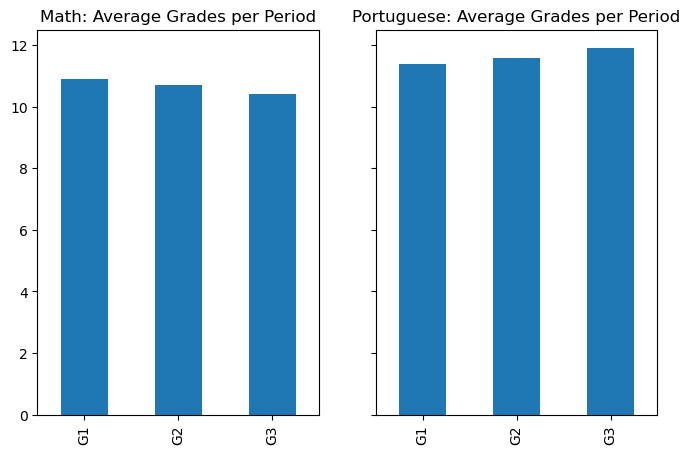

In [265]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[8, 5], sharey=True)

df_mat[['G1','G2','G3']].mean().plot(kind='bar', ax=axes[0])
axes[0].set_title('Math: Average Grades per Period')

df_por[['G1','G2','G3']].mean().plot(kind='bar', ax=axes[1])
axes[1].set_title('Portuguese: Average Grades per Period');

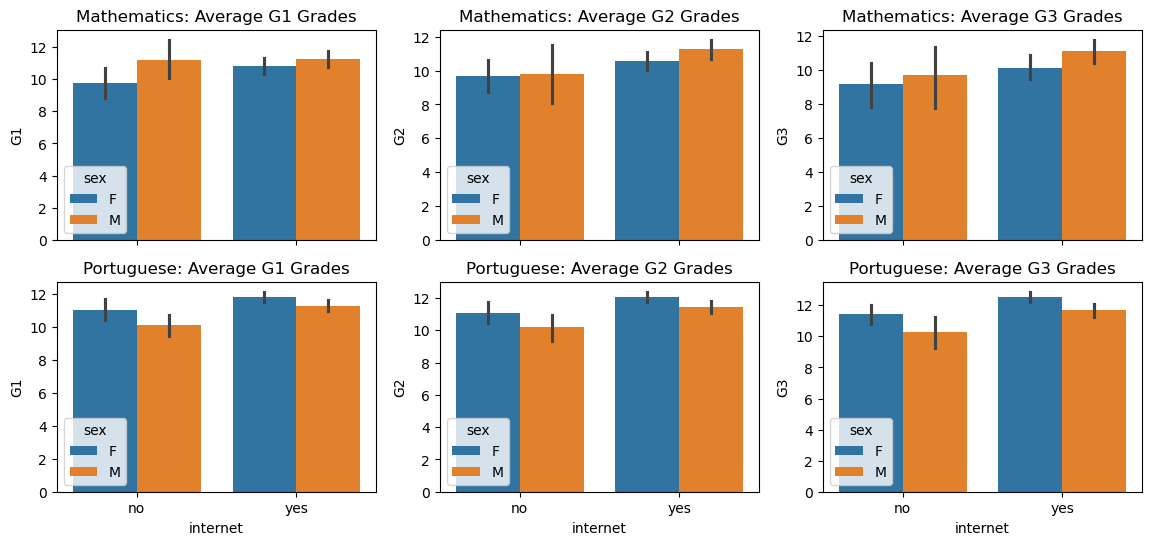

In [271]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[14,6], sharex=True)
s_name = ['Mathematics', 'Portuguese']
grades = ['G1','G2','G3']
subjects = [df_mat, df_por]
s_ct = 0

for i in range(2):
    g_ct = 0
    for j in range(3):
        sns.barplot(data=subjects[s_ct], x='internet', y=grades[g_ct], hue='sex', ax=axes[i,j])
        axes[i,j].set_title(f'{s_name[s_ct]}: Average {grades[g_ct]} Grades')
        g_ct += 1
    s_ct += 1

**Observations**
* On average, Portuguese grades across all periods are higher than Math grades.
* On average, students with internet access achieved higher grade scores.
* On average, females scored higher than males in Portuguese.
* On average, males scored higher than females in Math.

<BR>

### 2. **Perform Statistical Tests**:

* Conduct Chi-Square Tests to investigate the association between categorical variables (e.g., gender, internet access) and student grades. For example, is there a statistical difference in grades between students with different levels of parental education?
* Apply t-tests to compare the mean grades between two different groups, such as students from urban versus rural areas.
* Use regression analysis to predict final grades based on various factors like study time and past failures.
* Document your findings, interpret the p-values, and discuss the statistical significance of your results.

#### Mathematics Statistical Tests for the Final Period (G3)

In [312]:
#t-test for means of grades between school support and no school support 
stats.ttest_ind(df_mat.loc[df_mat.schoolsup == 'yes', 'G3'], df_mat.loc[df_mat.schoolsup == 'no', 'G3'])

TtestResult(statistic=-1.6468658378374499, pvalue=0.10038496363910417, df=393.0)

In [310]:
#t-test for means of grades between family support and no family support
stats.ttest_ind(df_mat.loc[df_mat.famsup == 'yes', 'G3'], df_mat.loc[df_mat.famsup == 'no', 'G3'])

TtestResult(statistic=-0.7768559575314726, pvalue=0.43771108589489893, df=393.0)

In [314]:
#t-test for means of grades between internet and no internet
stats.ttest_ind(df_mat.loc[df_mat.internet == 'yes', 'G3'], df_mat.loc[df_mat.internet == 'no', 'G3'])

TtestResult(statistic=1.961894129334101, pvalue=0.05048021213717338, df=393.0)

In [326]:
#t-test for means of grades between genders
stats.ttest_ind(df_mat.loc[df_mat.sex == 'M', 'G3'], df_mat.loc[df_mat.sex == 'F', 'G3'])

TtestResult(statistic=2.061992815503971, pvalue=0.039865332341527636, df=393.0)

**Observations**
* No statistical significance in grade averages for family support/no family support, school support/no school support, and internet/no internet.
* There is a statistical significance in the difference in average grades between males and females.

#### Portuguese Statistical Tests for the Final Period (G3)

In [328]:
#t-test for means of grades between school support and no school support 
stats.ttest_ind(df_por.loc[df_por.schoolsup == 'yes', 'G3'], df_por.loc[df_por.schoolsup == 'no', 'G3'])

TtestResult(statistic=-1.6928205340484455, pvalue=0.09097103846579739, df=647.0)

In [330]:
#t-test for means of grades between family support and no family support
stats.ttest_ind(df_por.loc[df_por.famsup == 'yes', 'G3'], df_por.loc[df_por.famsup == 'no', 'G3'])

TtestResult(statistic=1.508610422766134, pvalue=0.1318865120420247, df=647.0)

In [332]:
#t-test for means of grades between internet and no internet
stats.ttest_ind(df_por.loc[df_por.internet == 'yes', 'G3'], df_por.loc[df_por.internet == 'no', 'G3'])

TtestResult(statistic=3.8597451144078265, pvalue=0.0001248917344745216, df=647.0)

In [334]:
#t-test for means of grades between genders
stats.ttest_ind(df_por.loc[df_por.sex == 'M', 'G3'], df_por.loc[df_por.sex == 'F', 'G3'])

TtestResult(statistic=-3.310937693029702, pvalue=0.000981528706137396, df=647.0)

**Observations**
* No statistical significance in grade averages for family support/no family support, school support/no school support.
* There is a statistical significance in the difference in average grades between having internet and not having internet.
* There is a statistical significance in the difference in average grades between males and females.

<BR>

### Limitations, Insights, and Recommendations

**Limitations**
* Lack of a full data dictionary makes it difficult to understand the underlying data.

**Insights**
* On average, students scored better grades in Portuguese than in Mathematics. Perhaps a focus on support of the weaker subject could bolster grades.
* On average, students scored better grades in both subjects when there is internet access.
* On average, `males` scored **better** in `Mathematics` compared to `females` in the final period (G3). This is further backed by a t-test with a T-statistic and p-value of 2.06 and 0.04, respectively. A p-value of lower than .05 indicates statistical significance.
* On average, `females` scored **better** in `Portuguese` compared to `males` in the final period (G3). This is further backed by a t-test with a T-statistic and p-value of 3.31 and 0.00, respectively. A p-value of lower than .05 indicates statistical significance.

**Recommendations**
* **Subject Support**: Provide extra subject support where needed. This includes focusing on providing more support for Mathematics overall, more Mathematics suppot for females, and more Portuguese support for males.
* **Internet Availability**: Create or provide a program to enable better access to the internet, which would further bolster grades.
* **Data Availability**: Collect more data to gain better robust results.